# Exploratory data analysis 
Analysis of various technical indicators and price patterns

[*********************100%%**********************]  1 of 1 completed


c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


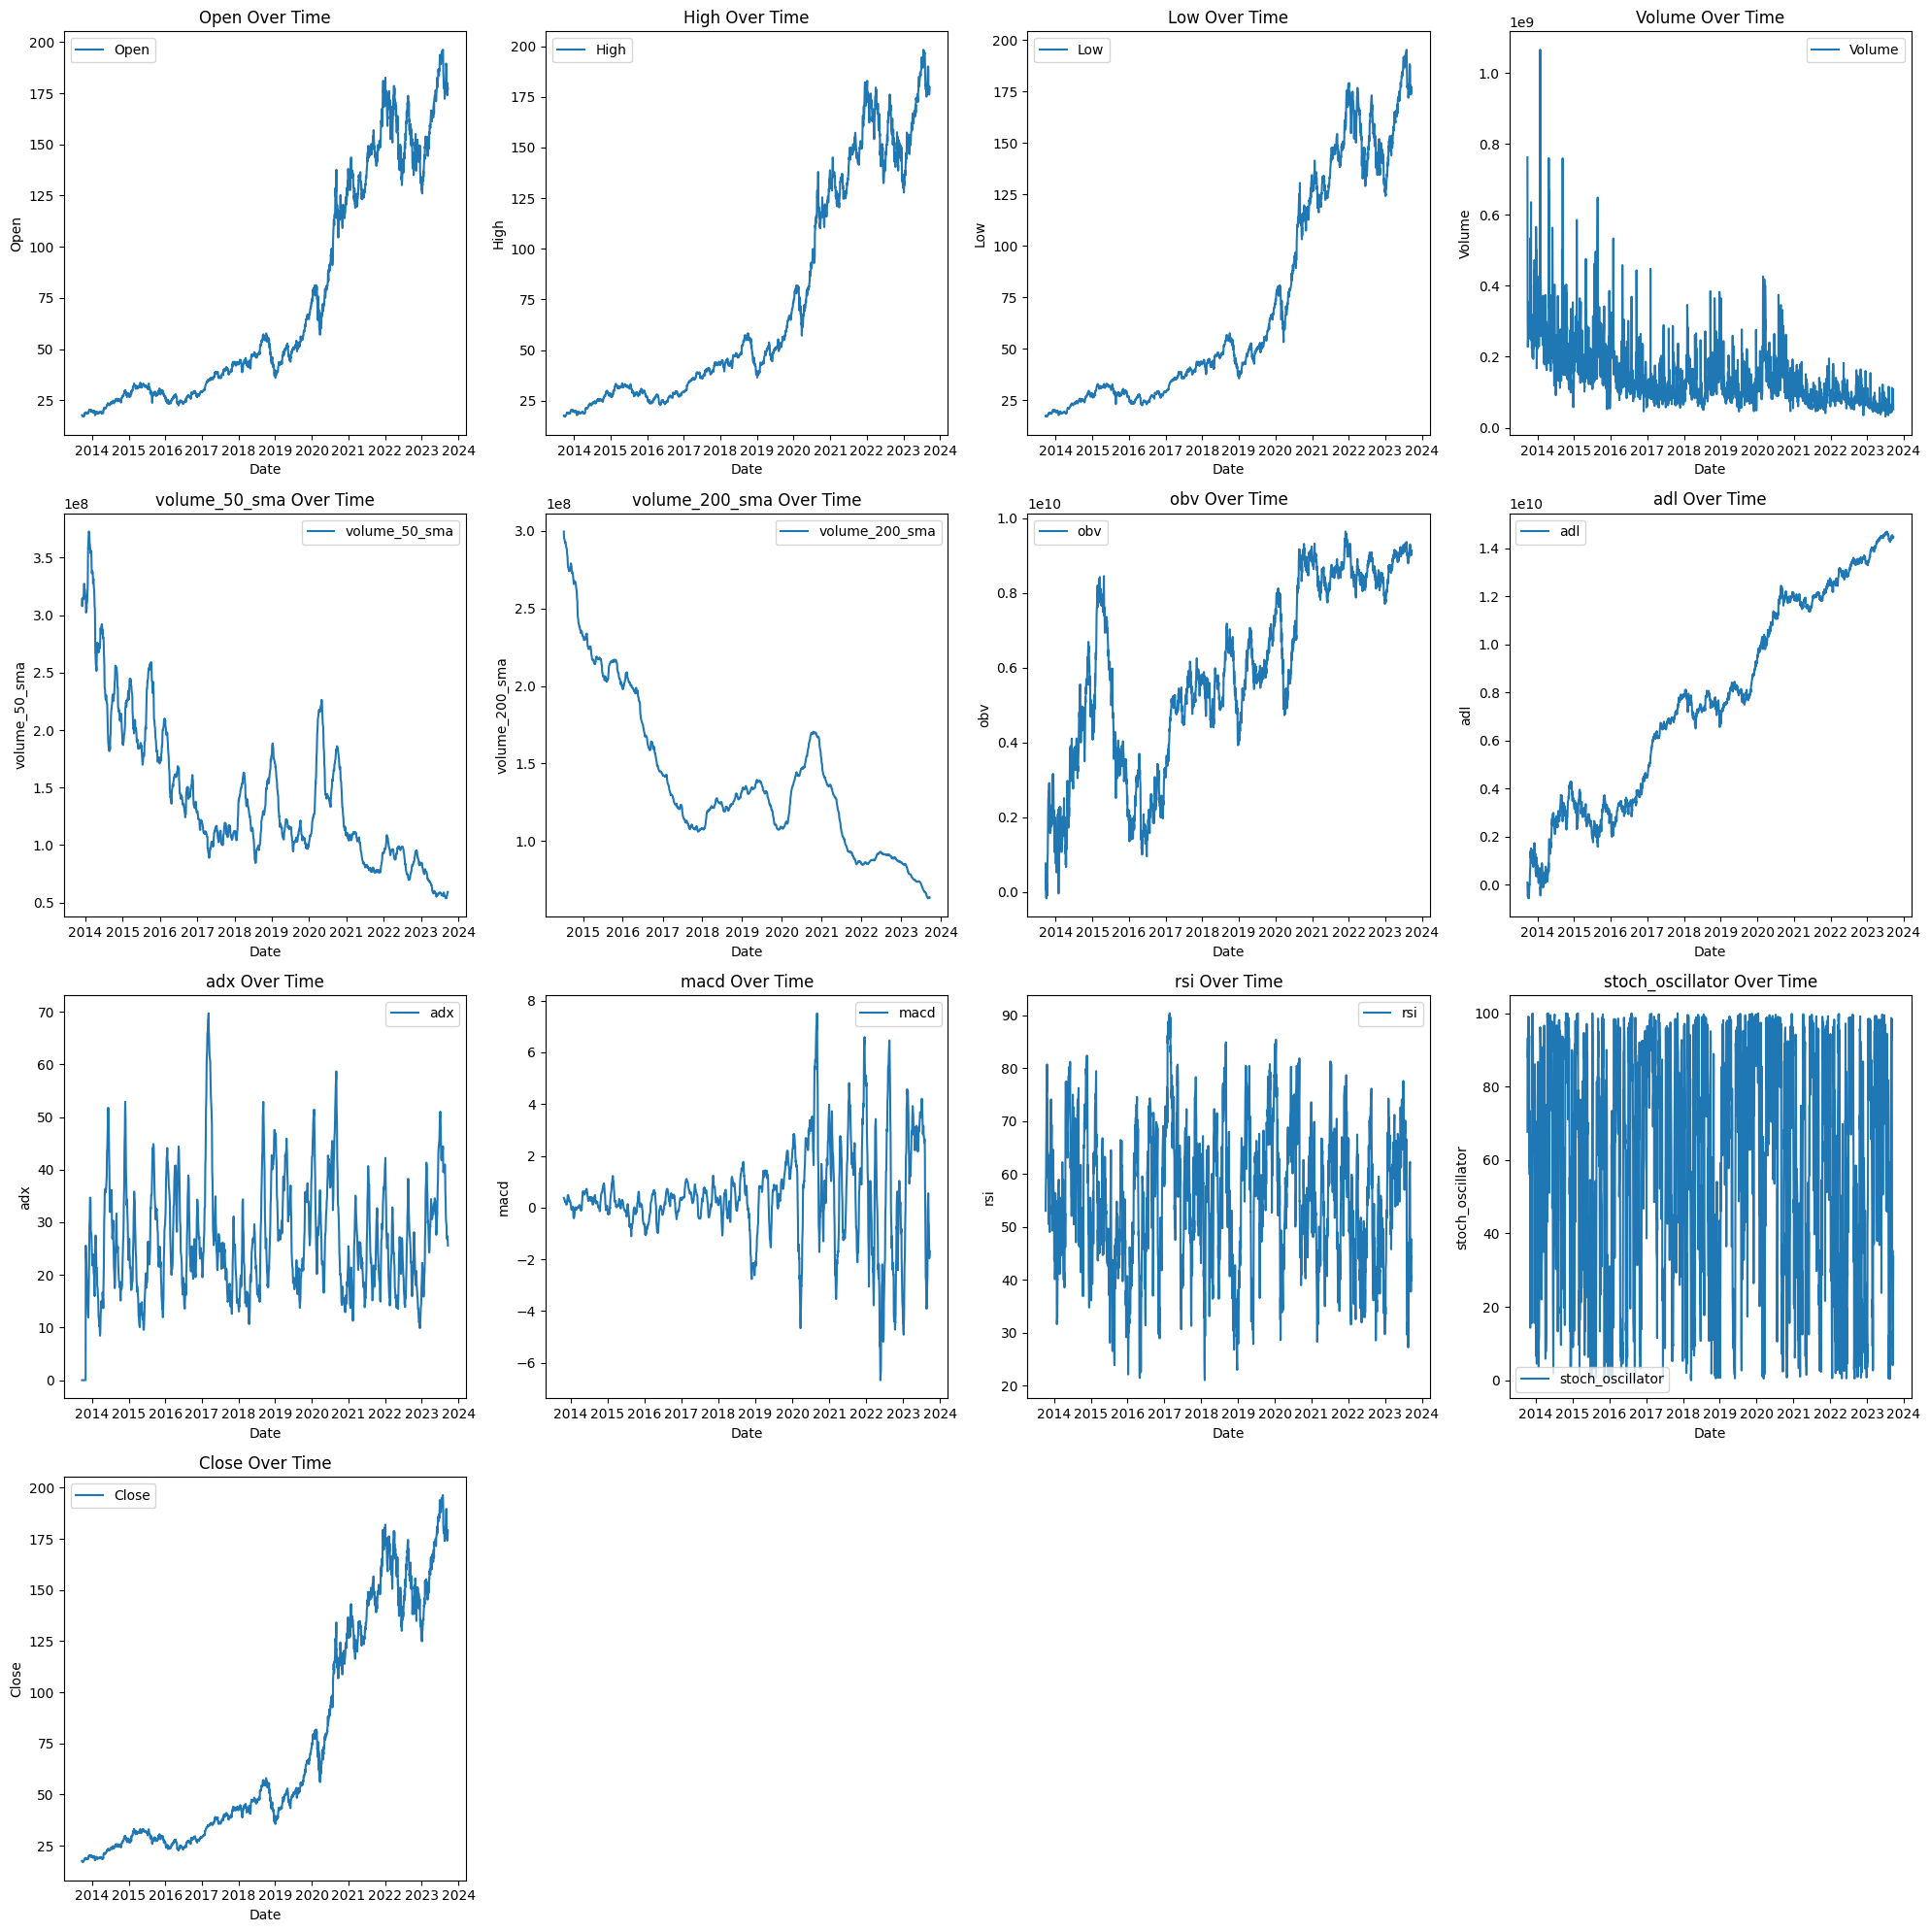

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import ta  # For technical indicators

# Download historical stock price data for Apple (AAPL) for the past 10 years
ticker_symbol = 'AAPL'
start_date = '2013-09-21'
end_date = '2023-09-20'  # Use one day before your prediction date
apple_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate technical indicators
apple_data = ta.add_all_ta_features(
    apple_data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Calculate moving averages of volume over different time periods
apple_data['volume_50_sma'] = ta.trend.sma_indicator(
    apple_data['Volume'], window=50)
apple_data['volume_200_sma'] = ta.trend.sma_indicator(
    apple_data['Volume'], window=200)

# Calculate additional technical indicators
apple_data['obv'] = ta.volume.on_balance_volume(
    apple_data['Close'], apple_data['Volume'])
apple_data['adl'] = ta.volume.acc_dist_index(
    apple_data['High'], apple_data['Low'], apple_data['Close'], apple_data['Volume'])
apple_data['adx'] = ta.trend.adx(
    apple_data['High'], apple_data['Low'], apple_data['Close'])
apple_data['macd'] = ta.trend.macd(apple_data['Close'])
apple_data['rsi'] = ta.momentum.rsi(apple_data['Close'])
apple_data['stoch_oscillator'] = ta.momentum.stoch(
    apple_data['High'], apple_data['Low'], apple_data['Close'])

# Define the features you want to visualize (excluding 'day_of_week' and adding technical indicators)
features = ['Open', 'High', 'Low', 'Volume', 'volume_50_sma', 'volume_200_sma',
            'obv', 'adl', 'adx', 'macd', 'rsi', 'stoch_oscillator', 'Close']

# Create subplots for each feature in a 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()  # Flatten the subplots for easier indexing

# Plot each feature
for i, feature in enumerate(features):
    axs[i].plot(apple_data.index, apple_data[feature], label=feature)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(feature)
    axs[i].set_title(f'{feature} Over Time')
    axs[i].legend()

# Remove any empty subplots if the number of features is less than 16
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


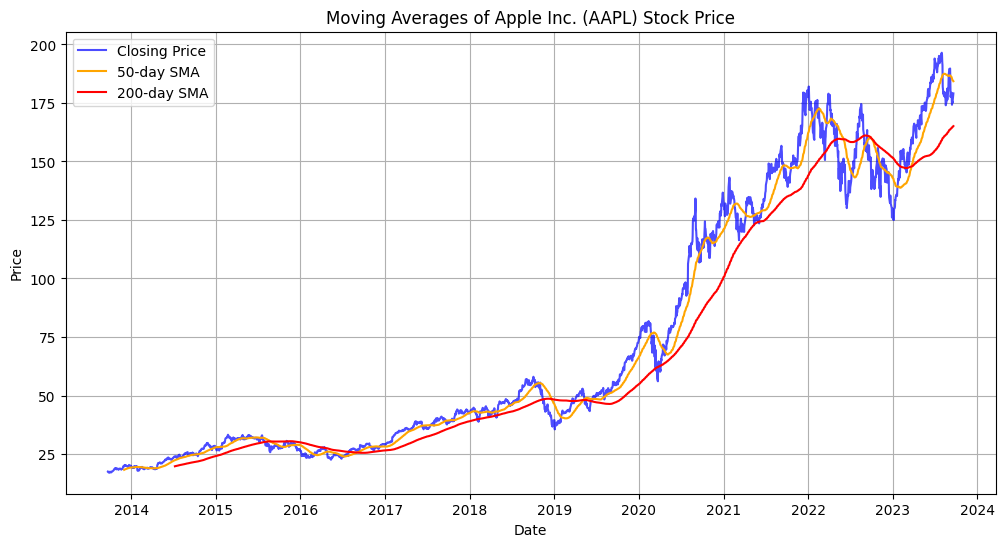

In [216]:
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Close'], label='Closing Price', color='blue', alpha=0.7)
plt.plot(apple_data.index, apple_data['Close'].rolling(window=50).mean(), label='50-day SMA', color='orange')
plt.plot(apple_data.index, apple_data['Close'].rolling(window=200).mean(), label='200-day SMA', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Moving Averages of Apple Inc. (AAPL) Stock Price")
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

We analyse the stock prices and several technical indicators of past 10 years data to predict the future prices 

In [217]:
import numpy as np
import pandas as pd
import yfinance as yf
import ta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical stock price data for Apple (AAPL) for the past 10 years
ticker_symbol = 'AAPL'
start_date = '2013-09-21'
end_date = '2023-09-20'
apple_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate technical indicators
apple_data = ta.add_all_ta_features(
    apple_data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Calculate moving averages of volume over different time periods
apple_data['volume_50_sma'] = ta.trend.sma_indicator(
    apple_data['Volume'], window=50)
apple_data['volume_200_sma'] = ta.trend.sma_indicator(
    apple_data['Volume'], window=200)

# Calculate additional technical indicators
apple_data['obv'] = ta.volume.on_balance_volume(
    apple_data['Close'], apple_data['Volume'])
apple_data['adl'] = ta.volume.acc_dist_index(
    apple_data['High'], apple_data['Low'], apple_data['Close'], apple_data['Volume'])
apple_data['adx'] = ta.trend.adx(
    apple_data['High'], apple_data['Low'], apple_data['Close'])
apple_data['macd'] = ta.trend.macd(apple_data['Close'])
apple_data['rsi'] = ta.momentum.rsi(apple_data['Close'])
apple_data['stoch_oscillator'] = ta.momentum.stoch(
    apple_data['High'], apple_data['Low'], apple_data['Close'])

# Shift the 'Open' price to get the next day's OPEN price
# Calculate the next day's OPEN price by shifting the 'Open' column
apple_data['next_day_open'] = apple_data['Open'].shift(-1)

# Drop rows with NaN values (which will be in the last row due to shifting)
apple_data = apple_data.dropna()

# Define the feature variables (technical indicators and other relevant features)
features = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'volume_50_sma', 'volume_200_sma',
    'obv', 'adl', 'adx', 'macd', 'rsi', 'stoch_oscillator'
]

X = apple_data[features]
y = apple_data['next_day_open']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



[*********************100%%**********************]  1 of 1 completed


c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [218]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [219]:
# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.6503703901235138
Mean Squared Error: 1.4330472435691382
R-squared: 0.9994966878609569


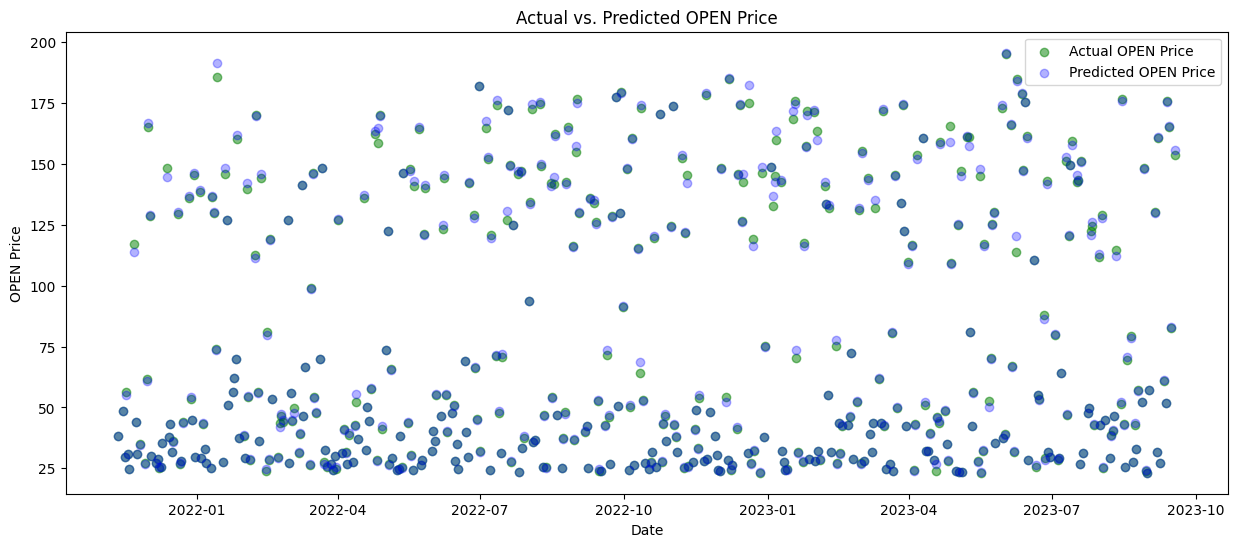

In [223]:
# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.scatter(apple_data.index[-len(y_test):], y_test,
            c='green', label='Actual OPEN Price', alpha=0.5)
plt.scatter(apple_data.index[-len(y_test):], y_pred,
            c='blue', label='Predicted OPEN Price', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("OPEN Price")
plt.title("Actual vs. Predicted OPEN Price")
plt.legend()
plt.show()

## Predicting prices of next 10 days

In [221]:

def predict_next_10_days_open_prices(ticker_symbol, start_date, end_date):
    # Download historical stock price data
    apple_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Calculate technical indicators
    apple_data = ta.add_all_ta_features(
        apple_data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

    # Calculate moving averages of volume over different time periods
    apple_data['volume_50_sma'] = ta.trend.sma_indicator(
        apple_data['Volume'], window=50)
    apple_data['volume_200_sma'] = ta.trend.sma_indicator(
        apple_data['Volume'], window=200)

    # Calculate additional technical indicators
    apple_data['obv'] = ta.volume.on_balance_volume(
        apple_data['Close'], apple_data['Volume'])
    apple_data['adl'] = ta.volume.acc_dist_index(
        apple_data['High'], apple_data['Low'], apple_data['Close'], apple_data['Volume'])
    apple_data['adx'] = ta.trend.adx(
        apple_data['High'], apple_data['Low'], apple_data['Close'])
    apple_data['macd'] = ta.trend.macd(apple_data['Close'])
    apple_data['rsi'] = ta.momentum.rsi(apple_data['Close'])
    apple_data['stoch_oscillator'] = ta.momentum.stoch(
        apple_data['High'], apple_data['Low'], apple_data['Close'])

    # Shift the 'Open' price to get the next day's OPEN price
    apple_data['next_day_open'] = apple_data['Open'].shift(-1)

    # Drop rows with NaN values (which will be in the last row due to shifting)
    apple_data = apple_data.dropna()

    # Define the target variable (next day's OPEN price)
    y = apple_data['next_day_open']

    # Define the feature variables (technical indicators and other relevant features)
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'volume_50_sma', 'volume_200_sma',
        'obv', 'adl', 'adx', 'macd', 'rsi', 'stoch_oscillator'
    ]

    X = apple_data[features]

    # Split the Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Use the most recent data point to predict the next 10 days
    last_data_point = X.iloc[-1, :].values.reshape(1, -1)
    next_10_days_predictions = []

    for _ in range(10):
        # Predict the next day's OPEN price
        next_day_open = model.predict(last_data_point)
        next_10_days_predictions.append(next_day_open[0])
        
        # Update the data point with the predicted value for the next iteration
        last_data_point = np.roll(last_data_point, shift=-1)
        last_data_point[0, -1] = next_day_open

    return next_10_days_predictions

# Example usage:
ticker_symbol = 'AAPL'
start_date = '2013-09-21'
end_date = '2023-09-20'
next_10_days_predictions = predict_next_10_days_open_prices(ticker_symbol, start_date, end_date)
print("Predicted OPEN Prices for the Next 10 Days:")
print(next_10_days_predictions)


[*********************100%%**********************]  1 of 1 completed


c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


Predicted OPEN Prices for the Next 10 Days:
[178.10040991852992, 63241215.34130803, 65240279.13908972, 72264032.60125779, 8536293918.045356, 14861186139.497183, 2561806377.494616, -91021018.82924065, -1479883597.6706257, 125180412.82136479]


c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature